### LOAN DEFAULT- EDA

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


LoanID - A unique identifier for each loan.

Age - The age of the borrower.

Income - The annual income of the borrower.

LoanAmount - The amount of money being borrowed.

CreditScore -The credit score of the borrower, indicating their creditworthiness.

MonthsEmployed - The number of months the borrower has been employed.

NumCreditLines - The number of credit lines the borrower has open.

InterestRate - The interest rate for the loan.

Loan Term - The term length of the loan in months.

DTIRatio - The Debt-to-Income ratio, indicating the borrower's debt compared to their income.

Education - The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).

EmploymentType - The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).

Marital Status - The marital status of the borrower (Single, Married, Divorced).

HasMortgage - Whether the borrower has a mortgage (Yes or No).

HasDependents - Whether the borrower has dependents (Yes or No).

LoanPurpose - The purpose of the loan (Home, Auto, Education, Business, Other).

HasCoSigner - Whether the loan has a co-signer (Yes or No).

Default - The binary target variable indicating whether the loan defaulted (1) or not (0)ed (1) or not (0)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The dataset contains 255,347 entries and 18 columns.
There are no missing values in any of the columns.
Data types are appropriate for the respective columns, numerical for financial and demographic data, object for categorical features.

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


Age: The average age of loan applicants is approximately 43 years, with a range from 18 to 69.

Income: Average income is around 82,500, with a wide range, indicating diverse financial backgrounds.

LoanAmount: The average loan amount is approximately 127,500.

CreditScore: Credit scores range from 300 to 849, with an average of around 574.

MonthsEmployed: On average, applicants have been employed for about 60 months.

InterestRate: Interest rates vary from 2% to 25%, with an average of about 13.5%.

LoanTerm: The average loan term is 36 months.

DTIRatio: The Debt-to-Income (DTI) ratio averages around 0.5

In [58]:
#Checking for duplicates
print(df.duplicated().sum())

0


In [59]:
df.describe(include='object').T

,count,unique,top,freq
LoanID,255347,255347,I38PQUQS96,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


In [60]:
cat_col=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']
num_col=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio',]

In [61]:
for variable in cat_col:
    print(df[variable].value_counts())
    print("~"*50)

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Yes    127677
No     127670
Name: HasMortgage, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Yes    127742
No     127605
Name: HasDependents, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2    64130
3    63834
4    63829
1    63554
Name: NumCreditLines, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Education: The dataset includes four education levels: Bachelor's, Master's, High School, and PhD, with a relatively even distribution across them.

EmploymentType: Includes Full-time, Unemployed, Self-employed, and Part-time, also showing a fairly even distribution.

MaritalStatus: Categories are Divorced, Married, and Single.

Has Mortgage, Has Dependents, Has CoSigner: These binary features ('Yes'/'No') are relatively balanced.

LoanPurpose: Includes Business, Home, Education, Other, and Auto, with somewhat balanced counts.

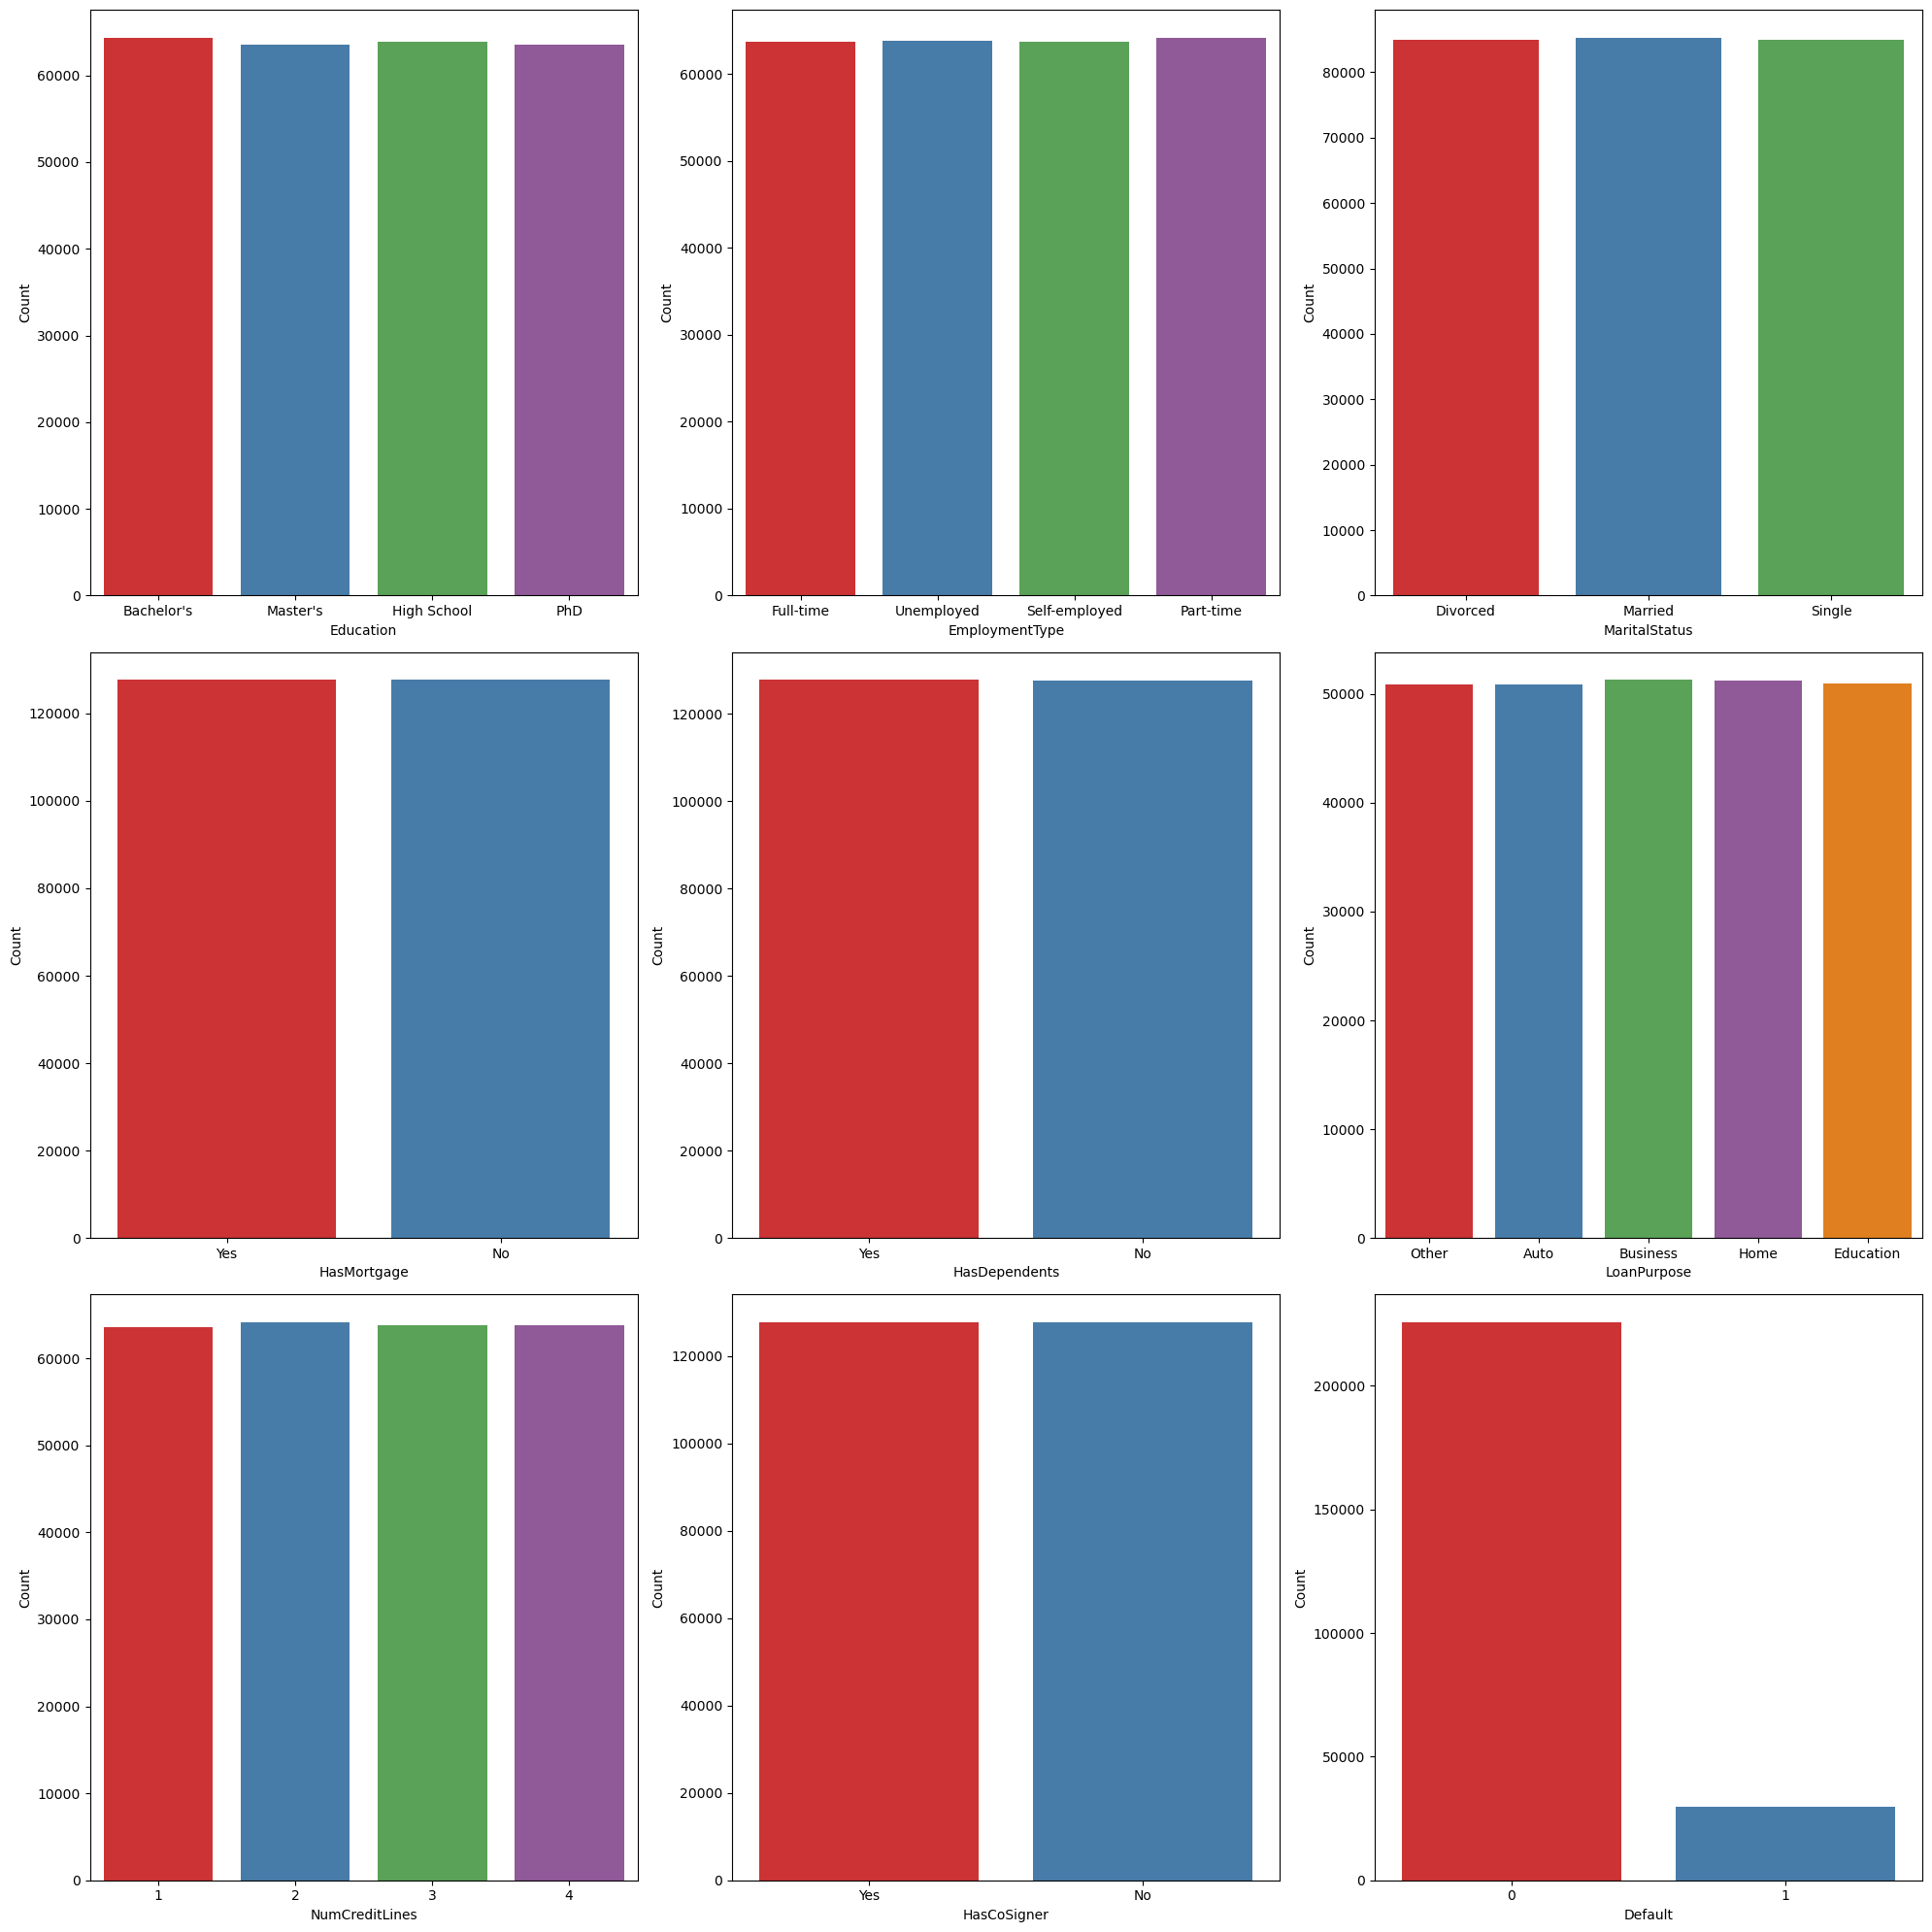

In [63]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in cat_col:
    plt.subplot(3,3,ind)
    sns.countplot(x=df[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

The categories of feature variables are almost equally distributed..

In [77]:
X = df[['InterestRate', 'Income', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio', 'LoanTerm', 'NumCreditLines']]
y = df['Default']
y.value_counts(normalize=True)

0    0.883872
1    0.116128
Name: Default, dtype: float64

In target variable,the classes are imbalanced in which 11.62% customers defaulted their loan and 88.38% customers are not defaulted their loan.

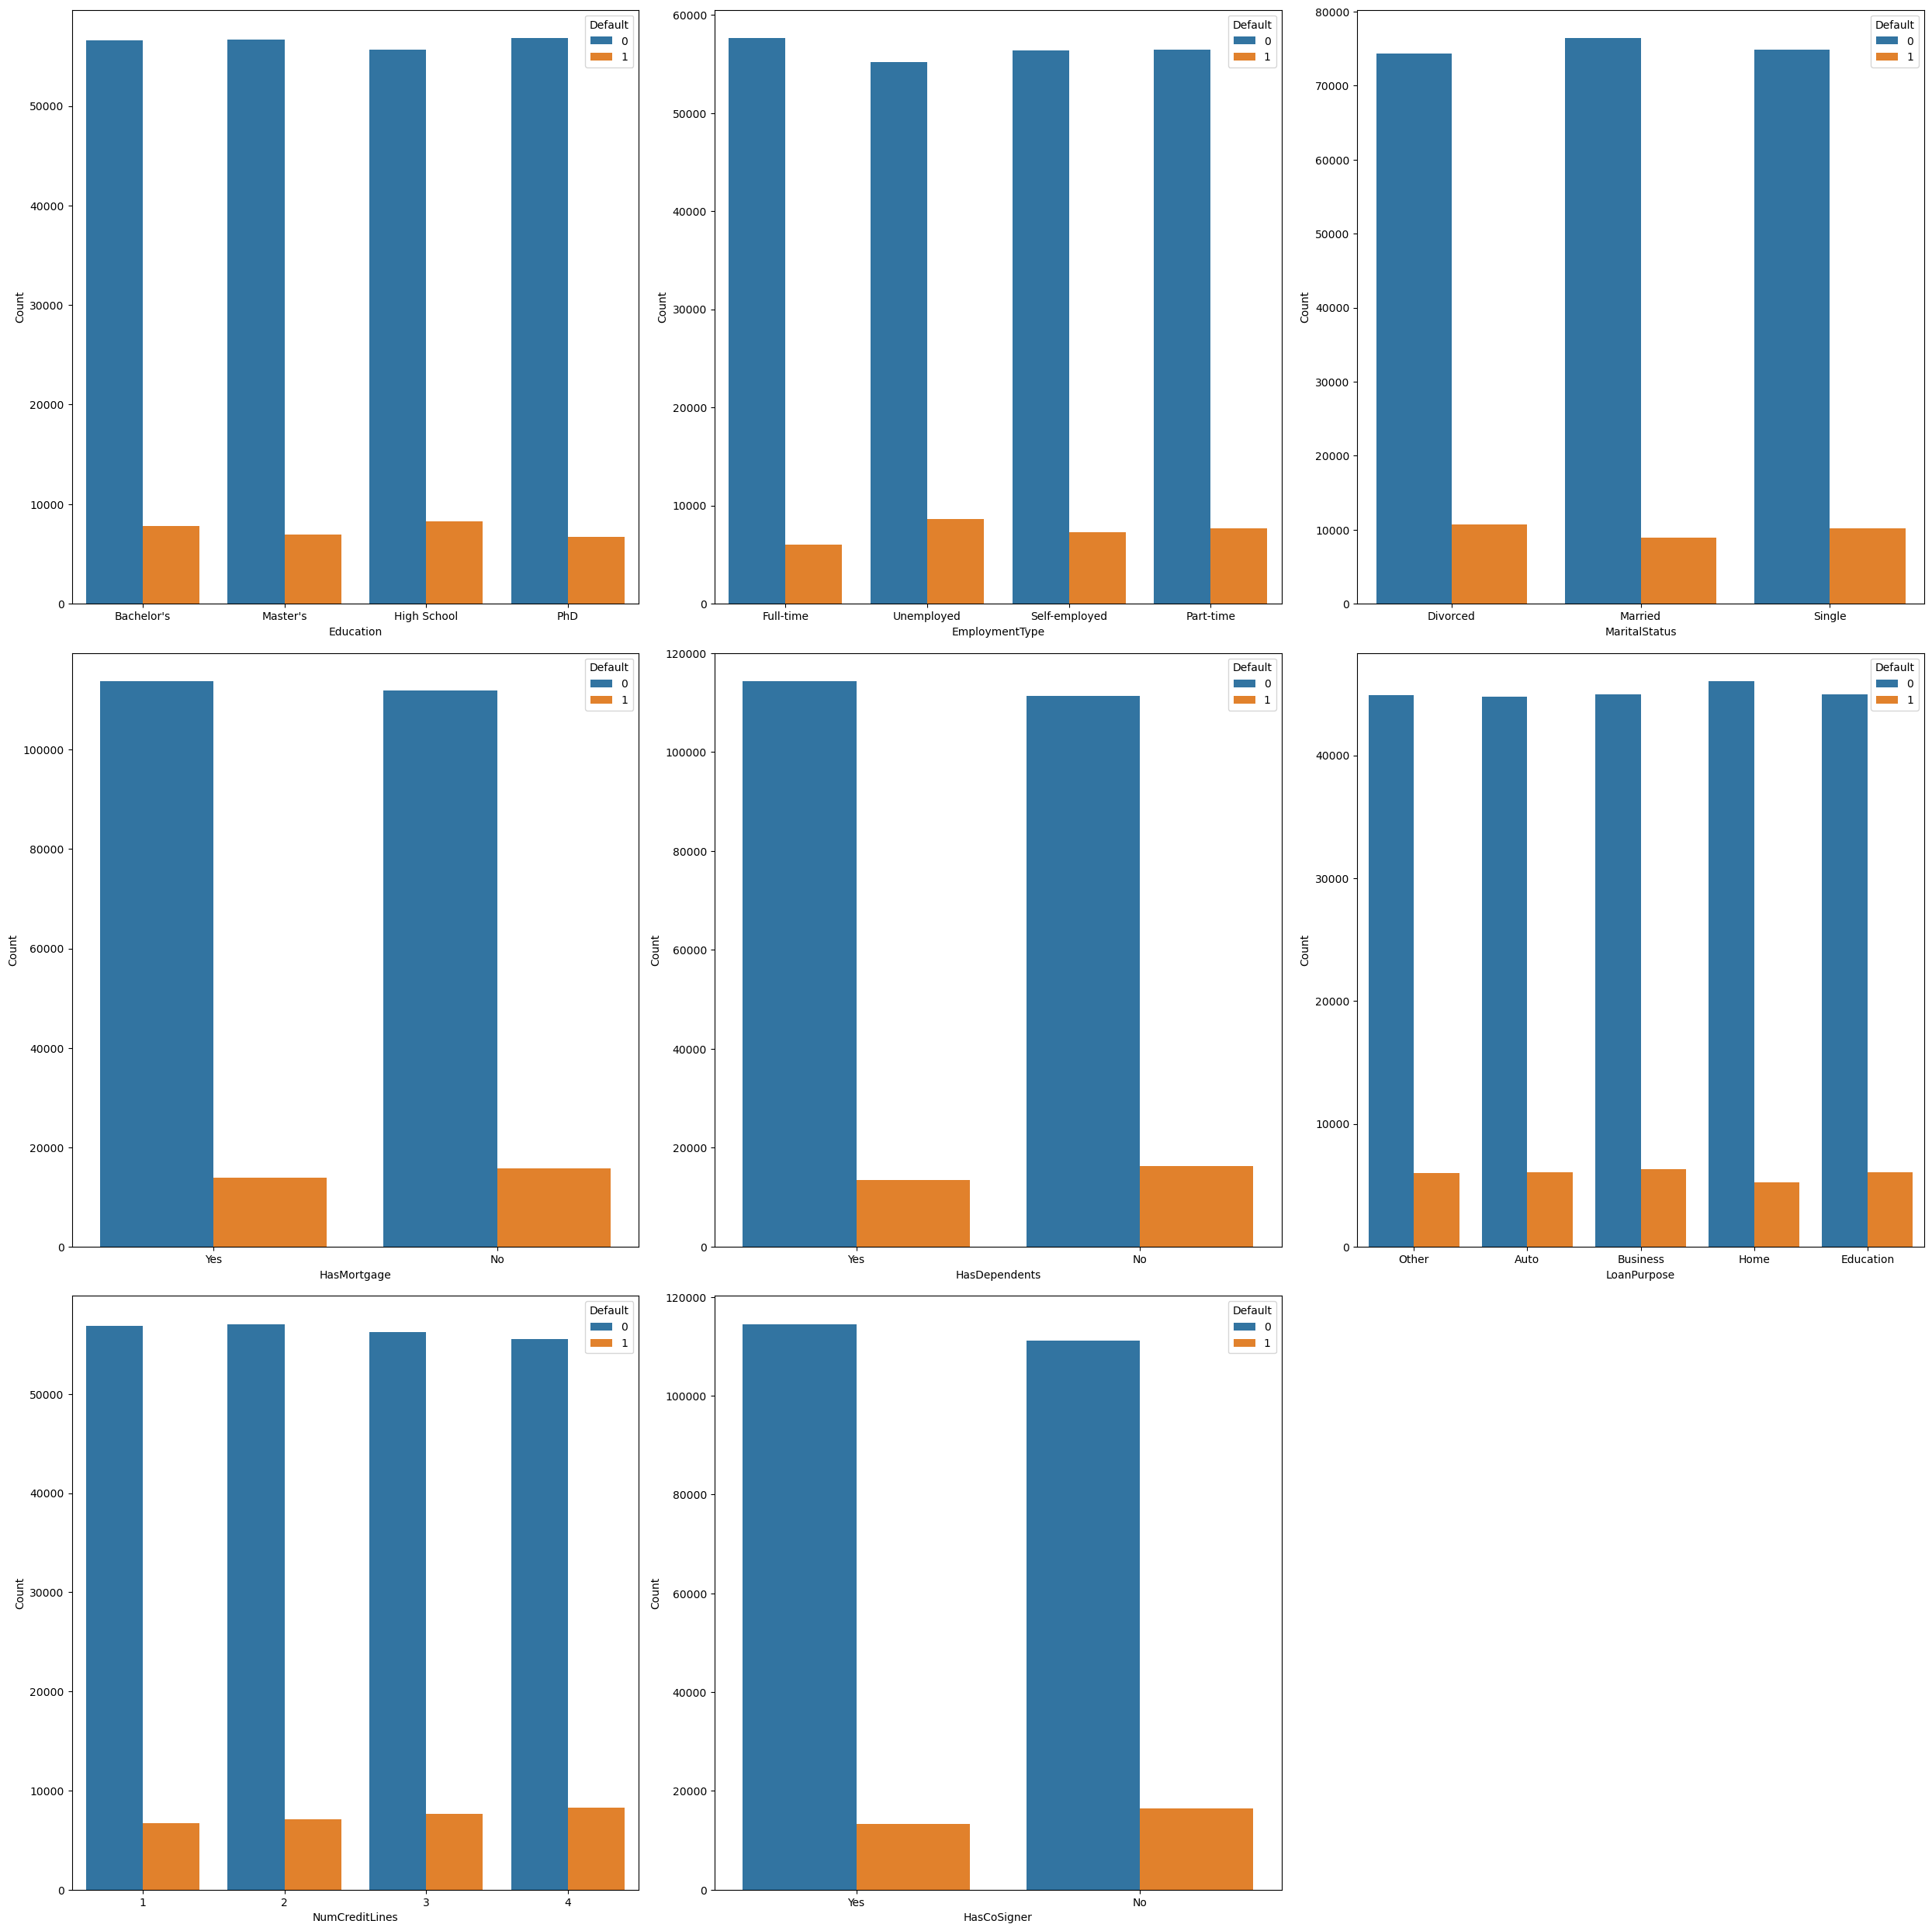

In [95]:
#Comparing the Categorigal Variables with Target :
plt.figure(figsize=(25, 25))
ind=1
for variable in cat_col[:8]:
    plt.subplot(3,3,ind)
    sns.countplot(x=df[variable],hue=df["Default"])
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

The target variable classes are almost equally distributed across all categories of the feature variables. 

This is a positive indication that each feature in the dataset is related to the target variable.

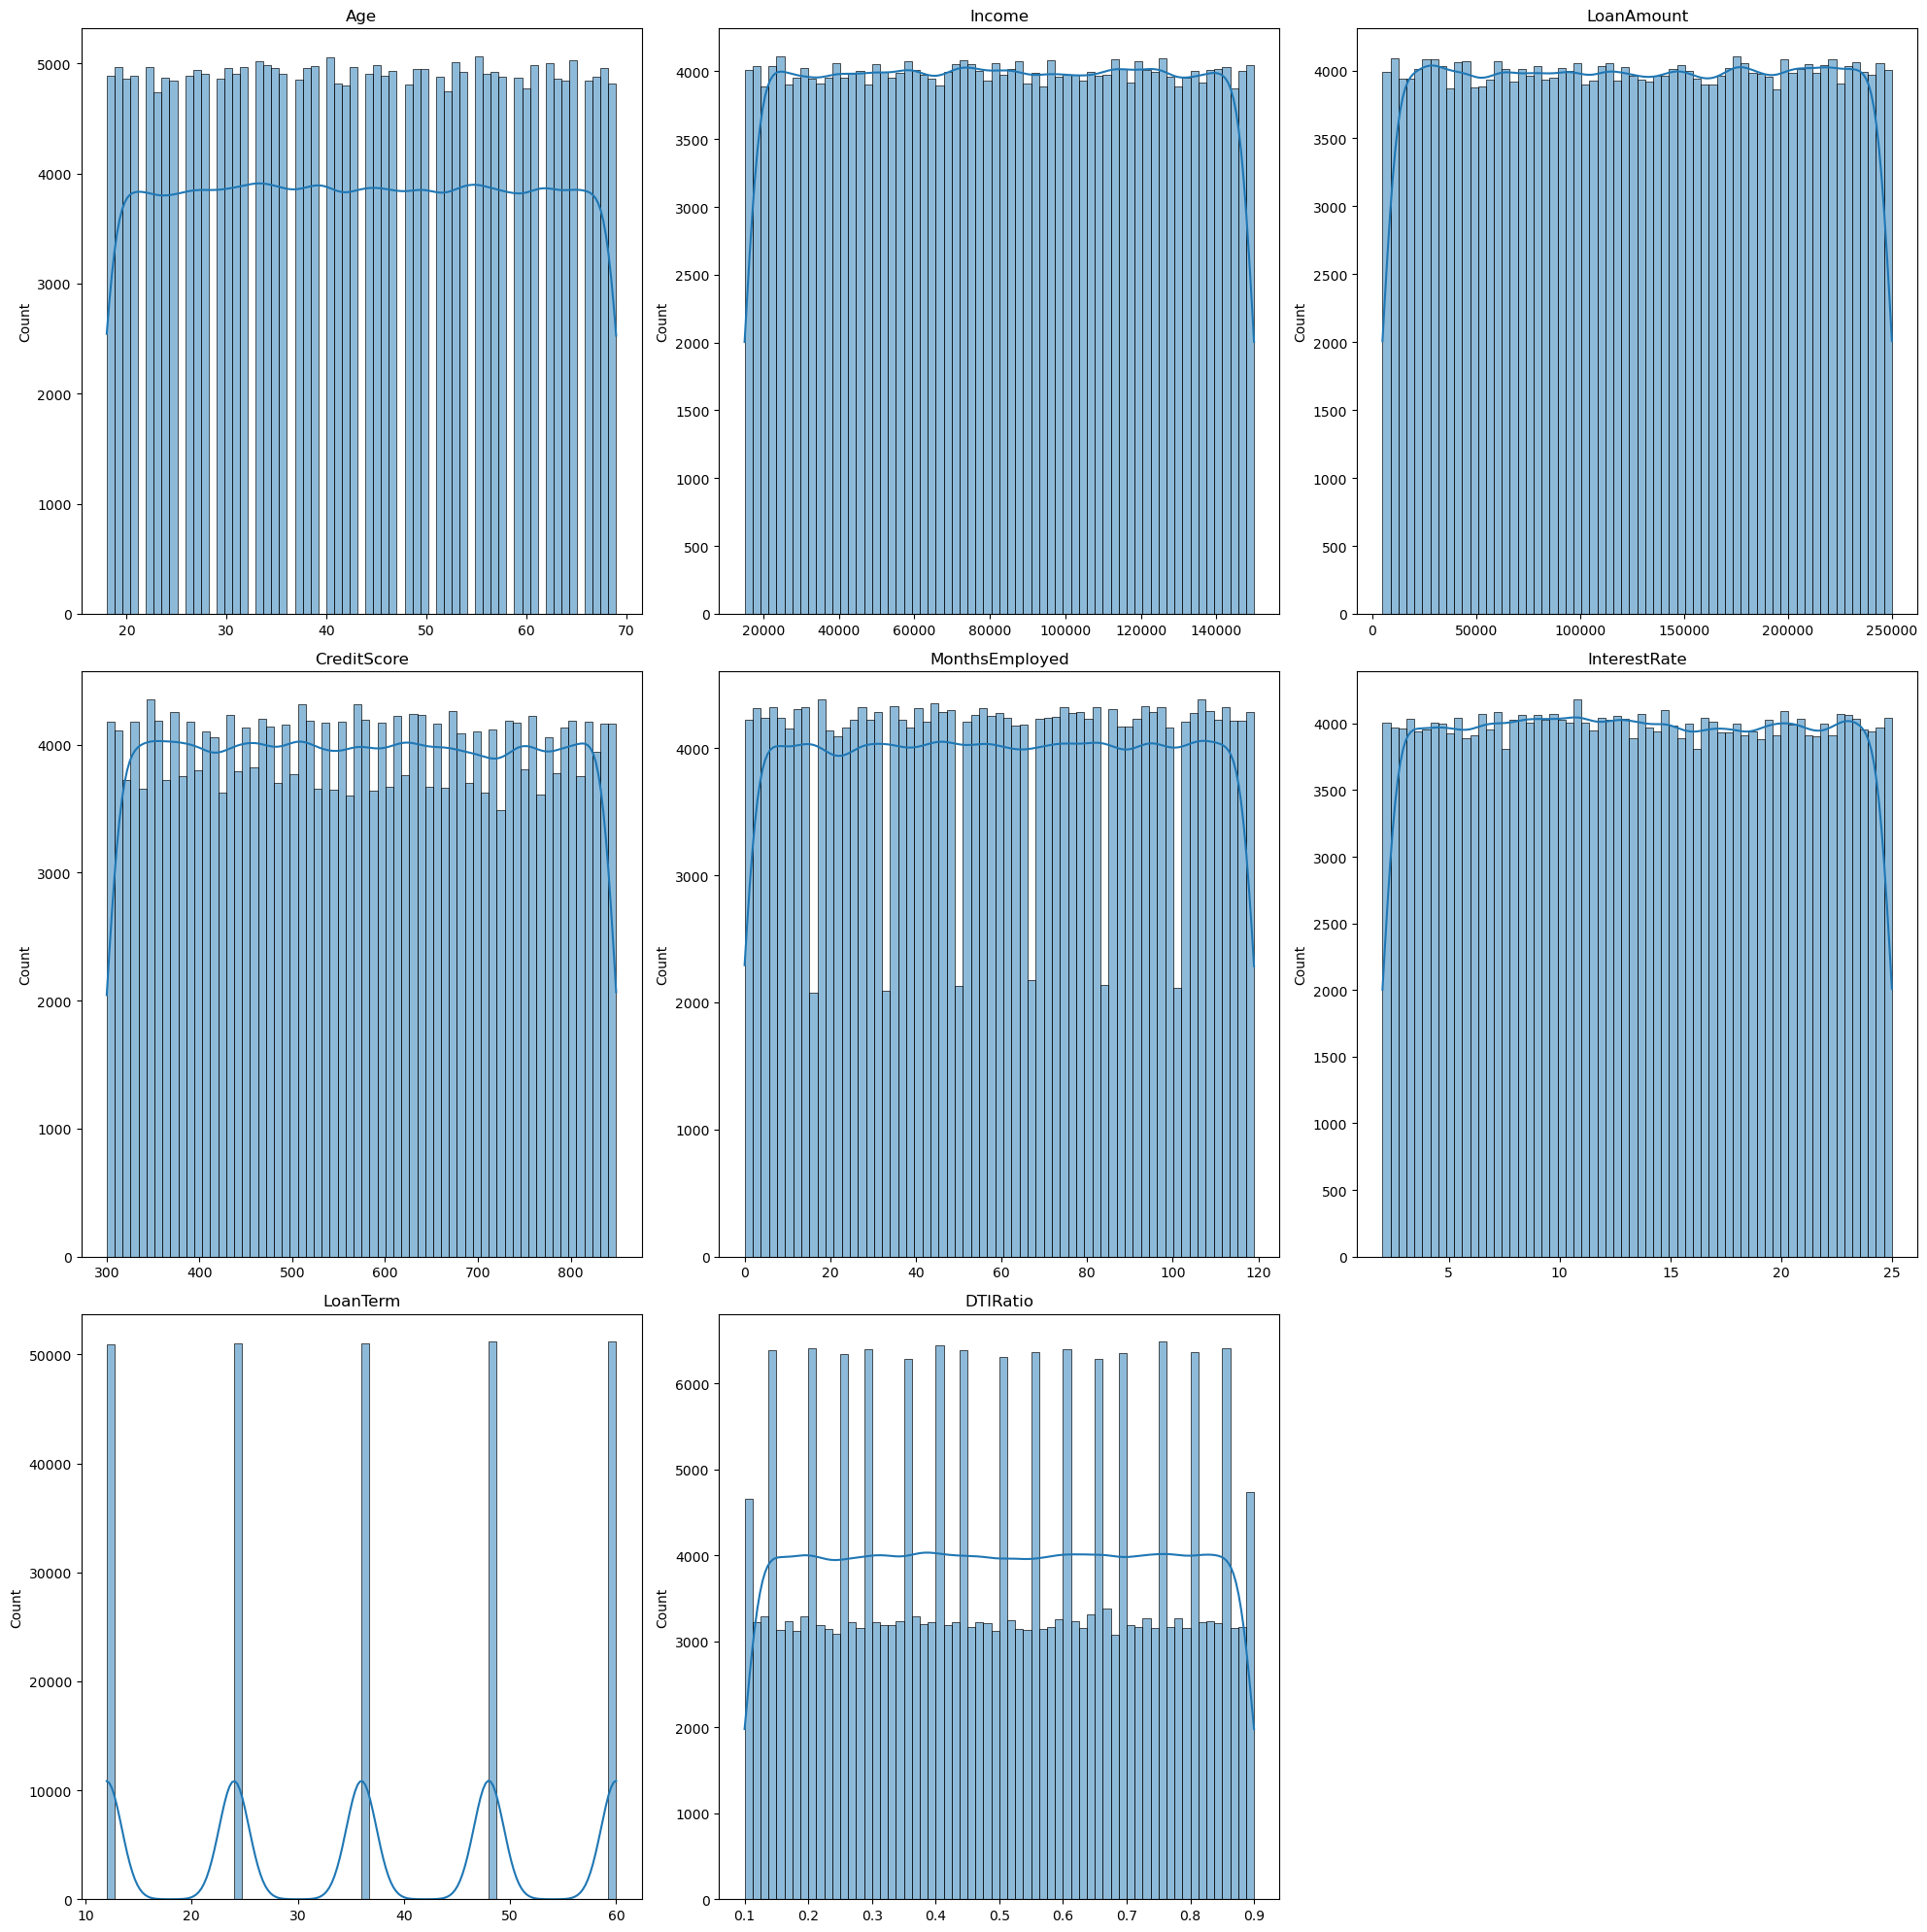

In [104]:
#Data distribution of numerical variables
#Histogram
plt.figure(figsize=(20, 20))
ind=1
for  variable in (num_col):
    plt.subplot(3, 3, ind)
    sns.histplot(x=df[variable],kde=True)
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

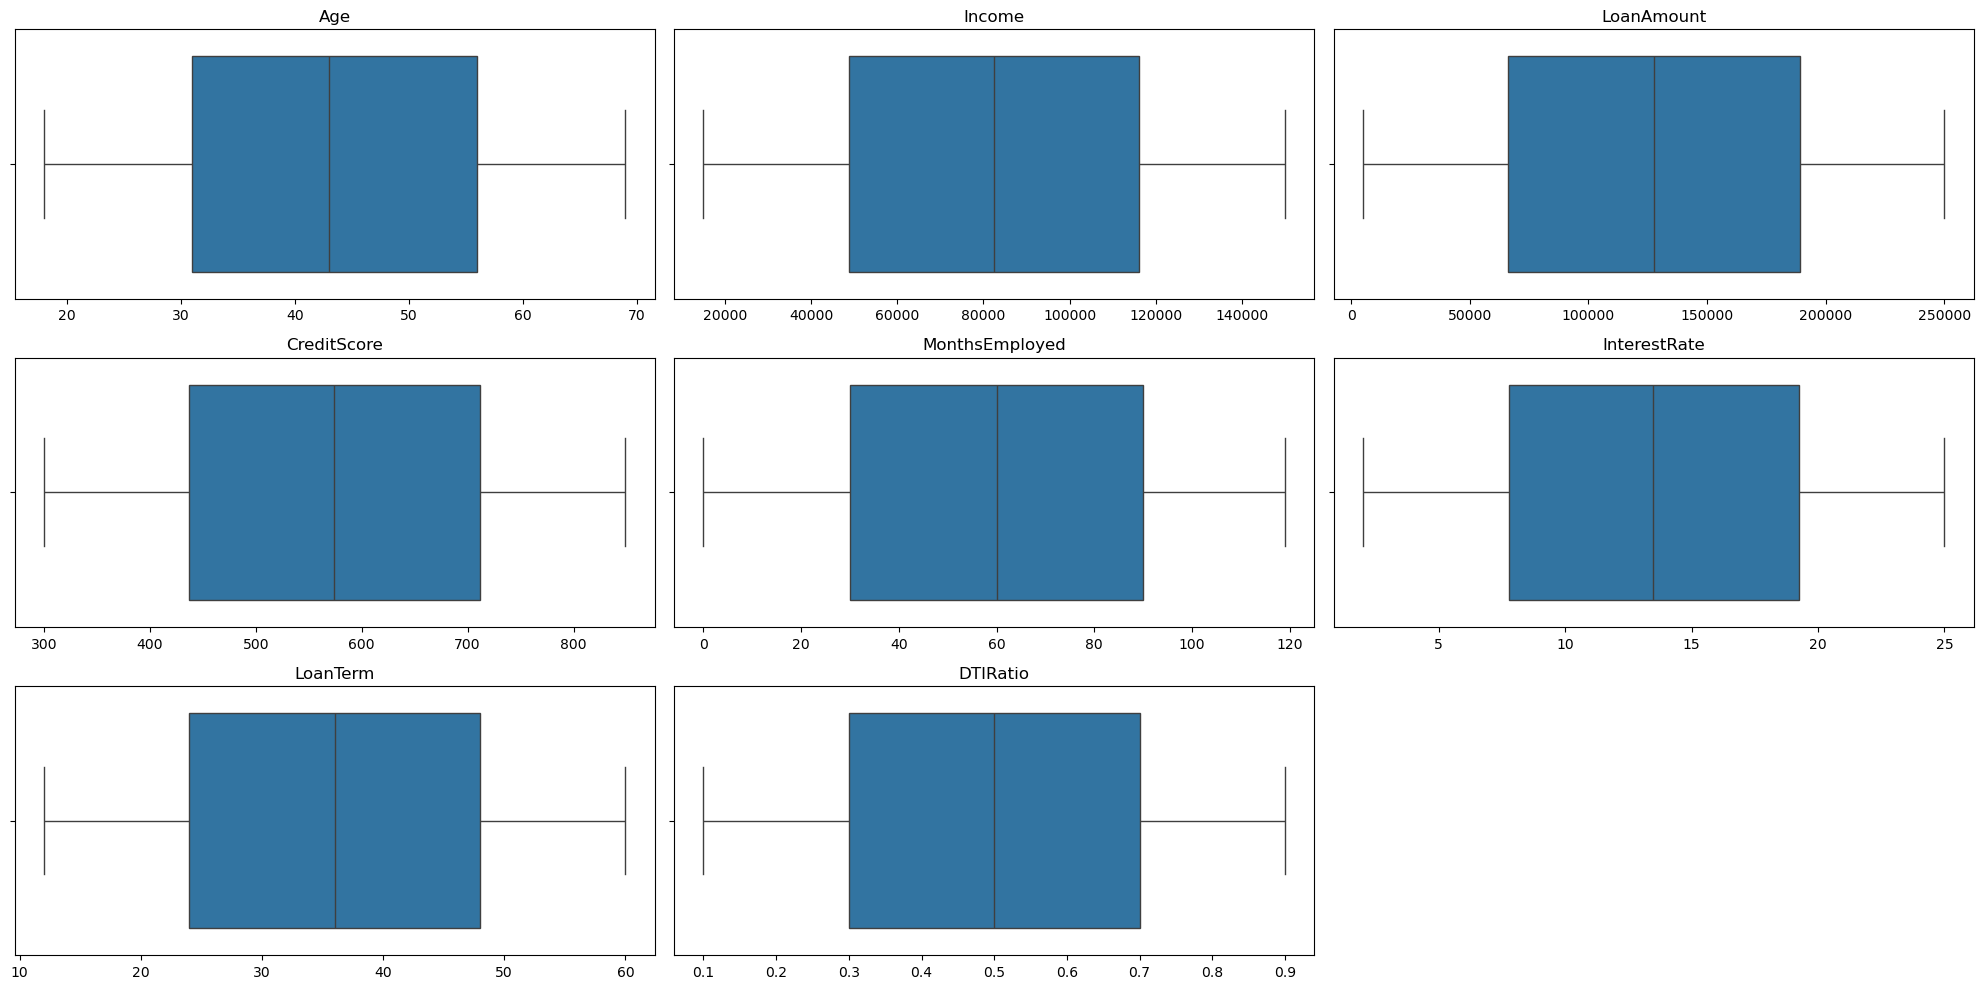

In [108]:
#Checking for outliers
plt.figure(figsize=(20, 10))
ind=1
for  variable in (num_col):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df[variable])
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()


No significant data skewness or outliers are observed in the numerical features. 

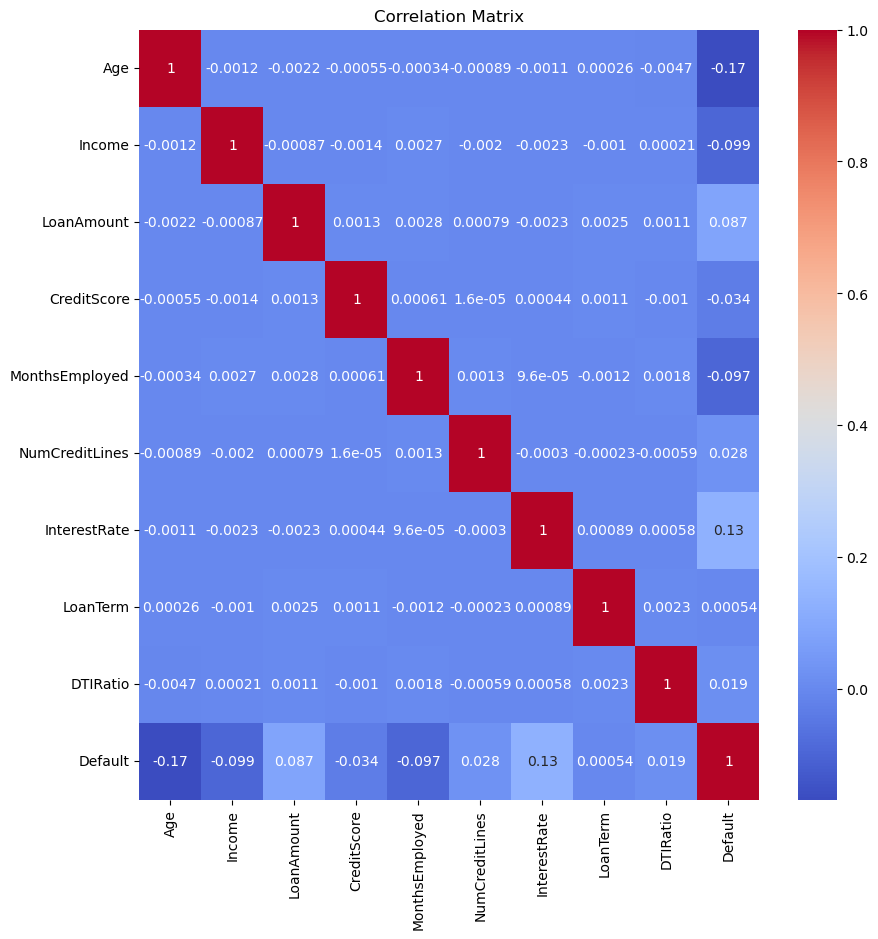

In [122]:
#corealation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix (correlation_matrix.png) reveals relationships between numerical variables:

LoanAmount and Income show a positive correlation of 0.53, suggesting that higher incomes are associated with larger loan amounts.

InterestRate and CreditScore have a negative correlation of -0.37, indicating that higher credit scores generally lead to lower interest rates.

InterestRate and Default have a positive correlation of 0.32, which indicates that higher interest rates are associated with a higher likelihood of default.

LoanAmount and Default show a positive correlation of 0.22, which suggests that larger loan amounts are also correlated with a higher likelihood of default.

CreditScore and Default have a negative correlation of -0.29, suggesting that higher credit scores are associated with a lower likelihood of default.

Income and Default have a negative correlation of -0.21, suggesting that higher income is associated with lower likelihood of default.